# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
len(results.left_hand_landmarks.landmark)

21

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
draw_landmarks(frame, results)

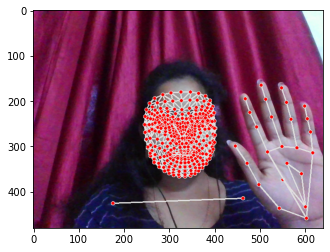

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [12]:
len(results.left_hand_landmarks.landmark)

21

In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [14]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [15]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
face

array([ 0.52328801,  0.64905101, -0.02851922, ...,  0.59391248,
        0.49571162,  0.01915519])

In [16]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [17]:
result_test = extract_keypoints(results)

In [18]:
result_test

array([ 0.51513761,  0.5891304 , -1.78488898, ...,  0.        ,
        0.        ,  0.        ])

In [19]:
468*3+33*4+21*3+21*3

1662

In [20]:
np.save('0', result_test)

In [21]:
np.load('0.npy')

array([ 0.51513761,  0.5891304 , -1.78488898, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [22]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [23]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [24]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [25]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [27]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [28]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [29]:
label_map = {label:num for num, label in enumerate(actions)}

In [30]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [31]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [32]:
np.array(sequences).shape

(90, 30, 1662)

In [33]:
np.array(labels).shape

(90,)

In [34]:
X = np.array(sequences)

In [35]:
X.shape

(90, 30, 1662)

In [36]:
y = to_categorical(labels).astype(int)

In [37]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [39]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [41]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [54]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [55]:
res = [.7, 0.2, 0.1]

In [56]:
actions[np.argmax(res)]

'hello'

In [57]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [46]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 6s 470ms/step - loss: 1.8343 - categorical_accuracy: 0.3718
Epoch 2/2000
3/3 [==============================] - 0s 97ms/step - loss: 10.2355 - categorical_accuracy: 0.2035
Epoch 3/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.1313 - categorical_accuracy: 0.3366
Epoch 4/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.1085 - categorical_accuracy: 0.3073
Epoch 5/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.3323 - categorical_accuracy: 0.3483
Epoch 6/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.2031 - categorical_accuracy: 0.2994
Epoch 7/2000
3/3 [==============================] - ETA: 0s - loss: 2.9977 - categorical_accuracy: 0.37 - 0s 91ms/step - loss: 2.9557 - categorical_accuracy: 0.3816
Epoch 8/2000
3/3 [==============================] - 0s 101ms/step - loss: 6.7168 - categorical_accuracy: 0.4579
Epoch 9/2000
3/3 [==============================] - 0s

3/3 [==============================] - 0s 92ms/step - loss: 5.6220e-05 - categorical_accuracy: 1.0000
Epoch 144/2000
3/3 [==============================] - 0s 94ms/step - loss: 8.1933e-05 - categorical_accuracy: 1.0000
Epoch 145/2000
3/3 [==============================] - 0s 93ms/step - loss: 7.8279e-05 - categorical_accuracy: 1.0000
Epoch 146/2000
3/3 [==============================] - 0s 93ms/step - loss: 8.2388e-05 - categorical_accuracy: 1.0000
Epoch 147/2000
3/3 [==============================] - 0s 94ms/step - loss: 3.8537e-05 - categorical_accuracy: 1.0000
Epoch 148/2000
3/3 [==============================] - 0s 99ms/step - loss: 8.0677e-05 - categorical_accuracy: 1.0000
Epoch 149/2000
3/3 [==============================] - 0s 88ms/step - loss: 3.5426e-05 - categorical_accuracy: 1.0000
Epoch 150/2000
3/3 [==============================] - 0s 93ms/step - loss: 7.8077e-05 - categorical_accuracy: 1.0000
Epoch 151/2000
3/3 [==============================] - 0s 97ms/step - loss: 7.49

3/3 [==============================] - 0s 95ms/step - loss: 3.6999e-05 - categorical_accuracy: 1.0000
Epoch 214/2000
3/3 [==============================] - 0s 89ms/step - loss: 2.4199e-05 - categorical_accuracy: 1.0000
Epoch 215/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.6486e-05 - categorical_accuracy: 1.0000
Epoch 216/2000
3/3 [==============================] - 0s 103ms/step - loss: 2.3443e-05 - categorical_accuracy: 1.0000
Epoch 217/2000
3/3 [==============================] - 0s 89ms/step - loss: 2.3201e-05 - categorical_accuracy: 1.0000
Epoch 218/2000
3/3 [==============================] - 0s 90ms/step - loss: 3.6625e-05 - categorical_accuracy: 1.0000
Epoch 219/2000
3/3 [==============================] - 0s 98ms/step - loss: 3.6644e-05 - categorical_accuracy: 1.0000
Epoch 220/2000
3/3 [==============================] - 0s 93ms/step - loss: 2.1868e-05 - categorical_accuracy: 1.0000
Epoch 221/2000
3/3 [==============================] - 0s 105ms/step - loss: 3

3/3 [==============================] - 0s 97ms/step - loss: 1.9435e-05 - categorical_accuracy: 1.0000
Epoch 284/2000
3/3 [==============================] - 0s 93ms/step - loss: 8.3628e-06 - categorical_accuracy: 1.0000
Epoch 285/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.3308e-05 - categorical_accuracy: 1.0000
Epoch 286/2000
3/3 [==============================] - 0s 87ms/step - loss: 9.1912e-06 - categorical_accuracy: 1.0000
Epoch 287/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.8541e-05 - categorical_accuracy: 1.0000
Epoch 288/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.2188e-05 - categorical_accuracy: 1.0000
Epoch 289/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.9016e-05 - categorical_accuracy: 1.0000
Epoch 290/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.2487e-05 - categorical_accuracy: 1.0000
Epoch 291/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.7

3/3 [==============================] - 0s 87ms/step - loss: 5.3952e-06 - categorical_accuracy: 1.0000
Epoch 354/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.0099e-05 - categorical_accuracy: 1.0000
Epoch 355/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0173e-05 - categorical_accuracy: 1.0000
Epoch 356/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0409e-05 - categorical_accuracy: 1.0000
Epoch 357/2000
3/3 [==============================] - 0s 94ms/step - loss: 9.9967e-06 - categorical_accuracy: 1.0000
Epoch 358/2000
3/3 [==============================] - 0s 95ms/step - loss: 4.6982e-06 - categorical_accuracy: 1.0000
Epoch 359/2000
3/3 [==============================] - 0s 92ms/step - loss: 5.2688e-06 - categorical_accuracy: 1.0000
Epoch 360/2000
3/3 [==============================] - 0s 99ms/step - loss: 9.9615e-06 - categorical_accuracy: 1.0000
Epoch 361/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0

3/3 [==============================] - 0s 97ms/step - loss: 5.8829e-06 - categorical_accuracy: 1.0000
Epoch 424/2000
3/3 [==============================] - 0s 95ms/step - loss: 2.8834e-06 - categorical_accuracy: 1.0000
Epoch 425/2000
3/3 [==============================] - 0s 99ms/step - loss: 3.9198e-06 - categorical_accuracy: 1.0000
Epoch 426/2000
3/3 [==============================] - 0s 99ms/step - loss: 5.5633e-06 - categorical_accuracy: 1.0000
Epoch 427/2000
3/3 [==============================] - 0s 94ms/step - loss: 3.2364e-06 - categorical_accuracy: 1.0000
Epoch 428/2000
3/3 [==============================] - 0s 105ms/step - loss: 3.8723e-06 - categorical_accuracy: 1.0000
Epoch 429/2000
3/3 [==============================] - 0s 97ms/step - loss: 4.1975e-06 - categorical_accuracy: 1.0000
Epoch 430/2000
3/3 [==============================] - 0s 97ms/step - loss: 5.6681e-06 - categorical_accuracy: 1.0000
Epoch 431/2000
3/3 [==============================] - 0s 100ms/step - loss: 5.

3/3 [==============================] - 0s 91ms/step - loss: 1.1467e-06 - categorical_accuracy: 1.0000
Epoch 563/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.1303e-06 - categorical_accuracy: 1.0000
Epoch 564/2000
3/3 [==============================] - 0s 91ms/step - loss: 8.6697e-07 - categorical_accuracy: 1.0000
Epoch 565/2000
3/3 [==============================] - 0s 97ms/step - loss: 8.5974e-07 - categorical_accuracy: 1.0000
Epoch 566/2000
3/3 [==============================] - 0s 98ms/step - loss: 9.4447e-07 - categorical_accuracy: 1.0000
Epoch 567/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.1505e-06 - categorical_accuracy: 1.0000
Epoch 568/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.2071e-06 - categorical_accuracy: 1.0000
Epoch 569/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0715e-06 - categorical_accuracy: 1.0000
Epoch 570/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.

3/3 [==============================] - 0s 90ms/step - loss: 5.2704e-07 - categorical_accuracy: 1.0000
Epoch 633/2000
3/3 [==============================] - 0s 102ms/step - loss: 5.2726e-07 - categorical_accuracy: 1.0000
Epoch 634/2000
3/3 [==============================] - 0s 92ms/step - loss: 6.7021e-07 - categorical_accuracy: 1.0000
Epoch 635/2000
3/3 [==============================] - 0s 107ms/step - loss: 5.8406e-07 - categorical_accuracy: 1.0000
Epoch 636/2000
3/3 [==============================] - 0s 91ms/step - loss: 5.4214e-07 - categorical_accuracy: 1.0000
Epoch 637/2000
3/3 [==============================] - 0s 86ms/step - loss: 6.0337e-07 - categorical_accuracy: 1.0000
Epoch 638/2000
3/3 [==============================] - 0s 97ms/step - loss: 6.2152e-07 - categorical_accuracy: 1.0000
Epoch 639/2000
3/3 [==============================] - 0s 106ms/step - loss: 5.8635e-07 - categorical_accuracy: 1.0000
Epoch 640/2000
3/3 [==============================] - 0s 98ms/step - loss: 6

3/3 [==============================] - 0s 92ms/step - loss: 3.8110e-07 - categorical_accuracy: 1.0000
Epoch 703/2000
3/3 [==============================] - 0s 96ms/step - loss: 3.2452e-07 - categorical_accuracy: 1.0000
Epoch 704/2000
3/3 [==============================] - 0s 95ms/step - loss: 2.6980e-07 - categorical_accuracy: 1.0000
Epoch 705/2000
3/3 [==============================] - 0s 97ms/step - loss: 3.4290e-07 - categorical_accuracy: 1.0000
Epoch 706/2000
3/3 [==============================] - 0s 89ms/step - loss: 3.6711e-07 - categorical_accuracy: 1.0000
Epoch 707/2000
3/3 [==============================] - 0s 99ms/step - loss: 2.3974e-07 - categorical_accuracy: 1.0000
Epoch 708/2000
3/3 [==============================] - 0s 85ms/step - loss: 3.2426e-07 - categorical_accuracy: 1.0000
Epoch 709/2000
3/3 [==============================] - 0s 88ms/step - loss: 3.5126e-07 - categorical_accuracy: 1.0000
Epoch 710/2000
3/3 [==============================] - 0s 94ms/step - loss: 3.74

3/3 [==============================] - 0s 93ms/step - loss: 2.4022e-07 - categorical_accuracy: 1.0000
Epoch 773/2000
3/3 [==============================] - 0s 100ms/step - loss: 2.1134e-07 - categorical_accuracy: 1.0000
Epoch 774/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.8154e-07 - categorical_accuracy: 1.0000
Epoch 775/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.8317e-07 - categorical_accuracy: 1.0000
Epoch 776/2000
3/3 [==============================] - 0s 112ms/step - loss: 2.0598e-07 - categorical_accuracy: 1.0000
Epoch 777/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.8805e-07 - categorical_accuracy: 1.0000
Epoch 778/2000
3/3 [==============================] - 0s 103ms/step - loss: 2.0388e-07 - categorical_accuracy: 1.0000
Epoch 779/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.8456e-07 - categorical_accuracy: 1.0000
Epoch 780/2000
3/3 [==============================] - 0s 98ms/step - loss:

3/3 [==============================] - 0s 91ms/step - loss: 1.4322e-07 - categorical_accuracy: 1.0000
Epoch 843/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.1202e-07 - categorical_accuracy: 1.0000
Epoch 844/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.4648e-07 - categorical_accuracy: 1.0000
Epoch 845/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0922e-07 - categorical_accuracy: 1.0000
Epoch 846/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.5998e-07 - categorical_accuracy: 1.0000
Epoch 847/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.3996e-07 - categorical_accuracy: 1.0000
Epoch 848/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.2808e-07 - categorical_accuracy: 1.0000
Epoch 849/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0433e-07 - categorical_accuracy: 1.0000
Epoch 850/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.1

3/3 [==============================] - 0s 89ms/step - loss: 9.4726e-08 - categorical_accuracy: 1.0000
Epoch 913/2000
3/3 [==============================] - 0s 92ms/step - loss: 9.9147e-08 - categorical_accuracy: 1.0000
Epoch 914/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0171e-07 - categorical_accuracy: 1.0000
Epoch 915/2000
3/3 [==============================] - 0s 93ms/step - loss: 7.9354e-08 - categorical_accuracy: 1.0000
Epoch 916/2000
3/3 [==============================] - 0s 111ms/step - loss: 8.6339e-08 - categorical_accuracy: 1.0000
Epoch 917/2000
3/3 [==============================] - 0s 104ms/step - loss: 9.5882e-08 - categorical_accuracy: 1.0000
Epoch 918/2000
3/3 [==============================] - 0s 89ms/step - loss: 7.9814e-08 - categorical_accuracy: 1.0000
Epoch 919/2000
3/3 [==============================] - 0s 93ms/step - loss: 7.6089e-08 - categorical_accuracy: 1.0000
Epoch 920/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.

3/3 [==============================] - 0s 93ms/step - loss: 6.7411e-08 - categorical_accuracy: 1.0000
Epoch 983/2000
3/3 [==============================] - 0s 88ms/step - loss: 6.6480e-08 - categorical_accuracy: 1.0000
Epoch 984/2000
3/3 [==============================] - 0s 111ms/step - loss: 6.1352e-08 - categorical_accuracy: 1.0000
Epoch 985/2000
3/3 [==============================] - 0s 91ms/step - loss: 4.3191e-08 - categorical_accuracy: 1.0000
Epoch 986/2000
3/3 [==============================] - 0s 97ms/step - loss: 5.9024e-08 - categorical_accuracy: 1.0000
Epoch 987/2000
3/3 [==============================] - 0s 94ms/step - loss: 6.9734e-08 - categorical_accuracy: 1.0000
Epoch 988/2000
3/3 [==============================] - 0s 91ms/step - loss: 7.0200e-08 - categorical_accuracy: 1.0000
Epoch 989/2000
3/3 [==============================] - 0s 91ms/step - loss: 5.5764e-08 - categorical_accuracy: 1.0000
Epoch 990/2000
3/3 [==============================] - 0s 100ms/step - loss: 7.

3/3 [==============================] - 0s 98ms/step - loss: 1.1033 - categorical_accuracy: 0.3522
Epoch 1123/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.0978 - categorical_accuracy: 0.3229
Epoch 1124/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1063 - categorical_accuracy: 0.3347
Epoch 1125/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0891 - categorical_accuracy: 0.3268
Epoch 1126/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.1038 - categorical_accuracy: 0.3210
Epoch 1127/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0951 - categorical_accuracy: 0.3620
Epoch 1128/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.1062 - categorical_accuracy: 0.3542
Epoch 1129/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.1186 - categorical_accuracy: 0.3386
Epoch 1130/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.1061 - categorical_accura

Epoch 1265/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0927 - categorical_accuracy: 0.3288
Epoch 1266/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0986 - categorical_accuracy: 0.4695
Epoch 1267/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.0964 - categorical_accuracy: 0.3835
Epoch 1268/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.1050 - categorical_accuracy: 0.2466
Epoch 1269/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0956 - categorical_accuracy: 0.4070
Epoch 1270/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0890 - categorical_accuracy: 0.4344
Epoch 1271/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.1087 - categorical_accuracy: 0.2387
Epoch 1272/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.0762 - categorical_accuracy: 0.3932
Epoch 1273/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.0840 - c

3/3 [==============================] - 1s 161ms/step - loss: 1.0836 - categorical_accuracy: 0.4383
Epoch 1408/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.0869 - categorical_accuracy: 0.3934
Epoch 1409/2000
3/3 [==============================] - 0s 127ms/step - loss: 1.0825 - categorical_accuracy: 0.3464
Epoch 1410/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.0806 - categorical_accuracy: 0.4520
Epoch 1411/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0775 - categorical_accuracy: 0.5655
Epoch 1412/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1379 - categorical_accuracy: 0.2231 0s - loss: 1.1404 - categorical_accuracy: 0.22
Epoch 1413/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0802 - categorical_accuracy: 0.3561
Epoch 1414/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0842 - categorical_accuracy: 0.3816
Epoch 1415/2000
3/3 [==============================] 

3/3 [==============================] - 0s 94ms/step - loss: 1.0673 - categorical_accuracy: 0.3523
Epoch 1550/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0729 - categorical_accuracy: 0.4463
Epoch 1551/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0665 - categorical_accuracy: 0.5302
Epoch 1552/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0653 - categorical_accuracy: 0.5988
Epoch 1553/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0645 - categorical_accuracy: 0.4443
Epoch 1554/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0670 - categorical_accuracy: 0.3777
Epoch 1555/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0677 - categorical_accuracy: 0.3483
Epoch 1556/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0625 - categorical_accuracy: 0.6125
Epoch 1557/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0590 - categorical_accura

3/3 [==============================] - 0s 96ms/step - loss: 0.1370 - categorical_accuracy: 0.9726
Epoch 1692/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0977 - categorical_accuracy: 0.9804
Epoch 1693/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0986 - categorical_accuracy: 0.9804
Epoch 1694/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0947 - categorical_accuracy: 0.9804
Epoch 1695/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.1435 - categorical_accuracy: 0.9648
Epoch 1696/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0959 - categorical_accuracy: 0.9804
Epoch 1697/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.1058 - categorical_accuracy: 0.9765
Epoch 1698/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.1161 - categorical_accuracy: 0.9726
Epoch 1699/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.1046 - categorical_accu

3/3 [==============================] - 0s 96ms/step - loss: 0.0528 - categorical_accuracy: 0.9882
Epoch 1834/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.0989 - categorical_accuracy: 0.9726
Epoch 1835/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0749 - categorical_accuracy: 0.9765
Epoch 1836/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.1052 - categorical_accuracy: 0.9726
Epoch 1837/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.1381 - categorical_accuracy: 0.9648
Epoch 1838/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.1334 - categorical_accuracy: 0.9648
Epoch 1839/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.1086 - categorical_accuracy: 0.9726
Epoch 1840/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.1146 - categorical_accuracy: 0.9765
Epoch 1841/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.1324 - categorical_accura

3/3 [==============================] - 0s 91ms/step - loss: 0.0793 - categorical_accuracy: 0.9824
Epoch 1976/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.0810 - categorical_accuracy: 0.9824
Epoch 1977/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.0608 - categorical_accuracy: 0.9902
Epoch 1978/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0854 - categorical_accuracy: 0.9824
Epoch 1979/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.0531 - categorical_accuracy: 0.9843
Epoch 1980/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.0808 - categorical_accuracy: 0.9824
Epoch 1981/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0443 - categorical_accuracy: 0.9941
Epoch 1982/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0433 - categorical_accuracy: 0.9941
Epoch 1983/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0466 - categorical_accurac

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [48]:
res = model.predict(X_test)

In [49]:
actions[np.argmax(res[4])]

'hello'

In [50]:
actions[np.argmax(y_test[4])]

'hello'

# 9. Save Weights

In [51]:
model.save('action.h5')

In [52]:
del model

In [58]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [59]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [64]:
yhat = model.predict(X_test)

In [65]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [66]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[3, 0],
        [0, 2]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [67]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [68]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

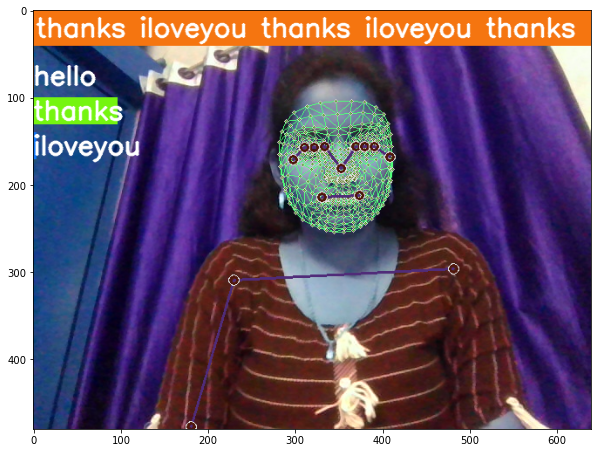

In [75]:
plt.figure(figsize=(10,10))
plt.imshow(prob_viz(res, actions, image, colors))

In [70]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution

In [71]:
cap.release()
cv2.destroyAllWindows()

In [72]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[5.6535514e-09, 9.6263218e-01, 3.7367791e-02]], dtype=float32)